In [2]:
from netCDF4 import Dataset
import iris
import numpy as np
import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature
from datetime import datetime,timedelta
from dateutil.relativedelta import relativedelta

In [3]:
#filename = '/Users/ananth/Downloads/SM_sden_ERA5_01Aug1980-31Jul2021_v01.nc'
#cube = iris.load(filename)

filename = '/Users/ananth/Downloads/SM_snod_ERA5_01Aug1980-31Jul2021_v01.nc'
cube = iris.load(filename)

lat_index = 0
lon_index = 0
snowdepth_index = 0

for i in range(2):
    varname = cube[i].var_name
    if varname == 'snod':
        snowdepth_index = i

snow_depth_org = cube[snowdepth_index].data
snow_depth_org[snow_depth_org<0] = 0
filename4 = '/Users/ananth/Downloads/icemotion_weekly_nh_25km_19781105_19781231_v4.1.nc'
cube4 = iris.load(filename4)

lat_index = 0
lon_index = 0

for i in range(5):
    varname = cube4[i].var_name
    if varname == 'latitude':
        lat_index = i
    elif varname == 'longitude':
        lon_index = i
        
lon = cube4[lon_index].data
lat = cube4[lat_index].data

snow_depth = snow_depth_org[-365:,:,:].data # this is for the one year .. slice 

snow_depth_1yr = snow_depth_org[-30:,:,:].data


/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/iris/fileformats/cf.py:649: UserWarning: Missing CF-netCDF grid mapping variable 'lambert_azimuthal_equal_area', referenced by netCDF variable 'snod'
  warnings.warn(message % (name, nc_var_name))


In [78]:
depth_cube = cube[snowdepth_index]
time_arr = depth_cube.coord('time').points
np.shape(time_arr)

start_date = '08/01/1980'
date_1 = datetime.strptime(start_date,'%m/%d/%Y').date()
date_arr =[start_date]
#new_date = []
new_date = 0

for i in range(len(time_arr)-1):
    new_date = date_1+timedelta(days = i)
    new_date_str = new_date.strftime('%m/%d/%Y')
    date_arr += [new_date_str]
    #print(date_arr)

index_1 = date_arr.index('01/01/2020')
index_2 = date_arr.index('12/31/2020')
#date_arr[index_1:index_2+1]

snow_depth_1yr_slice = snow_depth_org[index_1:index_2+1,:,:].data

start_date_2 = datetime.strptime('01/01/2020','%m/%d/%Y').date()

snow_depth_annual = np.zeros((12,361,361))

for i in range(12):
    
    new_date_2 = start_date_2+relativedelta(months= i) 
    new_date_2_str = new_date_2.strftime('%m/%d/%Y')
    index_2 = date_arr.index(new_date_2_str)
    snow_depth_1month = snow_depth_org[index_1:index_2+1,:,:]
    snow_depth_1month_mean = np.mean(snow_depth_1month,axis=0)
    snow_depth_annual[i,:,:] = snow_depth_1month_mean.data
    
    print(index_1,index_2)
    index_1 = index_2
    print(date_arr[index_2])
    
print(np.shape(snow_depth_annual))

14398 14398
01/01/2020
14398 14429
02/01/2020
14429 14458
03/01/2020
14458 14489
04/01/2020
14489 14519
05/01/2020
14519 14550
06/01/2020
14550 14580
07/01/2020
14580 14611
08/01/2020
14611 14642
09/01/2020
14642 14672
10/01/2020
14672 14703
11/01/2020
14703 14733
12/01/2020
(12, 361, 361)


In [67]:
# convert snow_depth_annual from 12,361,361 array to 12,722,722

lat_org = np.sort(lat.flatten())
lon_org = np.sort(lon.flatten())


lat_1d = lat.flatten()
lon_1d = lon.flatten()

lat_sort_index = np.argsort(lat_1d)
lon_sort_index = np.argsort(lon_1d)



lat_lon = np.zeros((722,722))

new_SD = np.zeros((12,722,722))

for i in range(722):
    index1 = np.where(lat_sort_index == i)
    index2 = np.where(lon_sort_index == i)
    
    new_SD[0,index1,index2] = snow_depth_annual[0,] 
    


"""
for i in range(len(lat_org)):
    index1 = np.where(lat_1d[i]==lat_org)
    index2 = np.where(lon_1d[index_1] == lon_org)
    for j in range(len(index1)):
        new_SD[0,j,index2]
        
        for j in range(len(lon_org)):
            index3 = np.where(lon)
        

np.shape(snow_depth_annual)

"""

a = np.array([1,2,3,4,5,0])
b= np.array([12,1,14,3,7,0])
print(np.argsort(a))
print(np.argsort(b))

np.where(lat_sort_index==1)
lat_sort_index[4]


[5 0 1 2 3 4]
[5 1 3 4 0 2]


1

In [96]:
# save snow depth, latitude and longitude into a netcdf file
import netCDF4 as nc
import os

fn = 'snow_depth_1.nc'

os.remove(fn)
ds = nc.Dataset(fn,'w',format = 'NETCDF4')

time = ds.createDimension('time',12)
lat_dim = ds.createDimension('unknown1',361)
lon_dim = ds.createDimension('unknown2',361)

temp_time = np.arange(1,13,1)
temp_lat = np.linspace(1,2,361)
temp_lon = np.linspace(1,2,361)
np.shape(temp_time)

times = ds.createVariable('time', 'f4', ('time',))
lats = ds.createVariable('unknown1', 'f4', ('unknown1',))
lons = ds.createVariable('unknown2', 'f4', ('unknown2',))
value = ds.createVariable('snow_depth', 'f4', ('time', 'unknown1', 'unknown2',))
value.units = 'm'

lats[:]=temp_lat
lons[:]=temp_lon
times[:]= temp_time

value[:,:,:] = snow_depth_annual
ds.close()

cube111 = iris.load('snow_depth_1.nc')
cube111


Snow Depth (m),time,unknown1,unknown2
Shape,12,361,361
Dimension coordinates,,,
time,x,-,-
unknown1,-,x,-
unknown2,-,-,x


In [99]:
#save latitude into a cube

import netCDF4 as nc
import os

fn = 'latitude.nc'

os.remove(fn)
ds = nc.Dataset(fn,'w',format = 'NETCDF4')

#time = ds.createDimension('time',12)
lat_dim = ds.createDimension('unknown1',361)
lon_dim = ds.createDimension('unknown2',361)

#temp_time = np.arange(1,13,1)
temp_lat = np.linspace(1,2,361)
temp_lon = np.linspace(1,2,361)
#np.shape(temp_time)

#times = ds.createVariable('time', 'f4', ('time',))
lats = ds.createVariable('unknown1', 'f4', ('unknown1',))
lons = ds.createVariable('unknown2', 'f4', ('unknown2',))
value = ds.createVariable('latitude', 'f4', ('unknown1', 'unknown2',))
value.units = 'm'

lats[:]=temp_lat
lons[:]=temp_lon
#times[:]= temp_time

value[:,:] = lat
ds.close()

cube111 = iris.load('latitude.nc')
cube111


Latitude (m),unknown1,unknown2
Shape,361,361
Dimension coordinates,,
unknown1,x,-
unknown2,-,x


In [100]:
#save longitude array into a cube

import netCDF4 as nc
import os

fn = 'longitude.nc'

#os.remove(fn)
ds = nc.Dataset(fn,'w',format = 'NETCDF4')

#time = ds.createDimension('time',12)
lat_dim = ds.createDimension('unknown1',361)
lon_dim = ds.createDimension('unknown2',361)

#temp_time = np.arange(1,13,1)
temp_lat = np.linspace(1,2,361)
temp_lon = np.linspace(1,2,361)
#np.shape(temp_time)

#times = ds.createVariable('time', 'f4', ('time',))
lats = ds.createVariable('unknown1', 'f4', ('unknown1',))
lons = ds.createVariable('unknown2', 'f4', ('unknown2',))
value = ds.createVariable('longitude', 'f4', ('unknown1', 'unknown2',))
value.units = 'm'

lats[:]=temp_lat
lons[:]=temp_lon
#times[:]= temp_time

value[:,:] = lon
ds.close()

cube111 = iris.load('longitude.nc')
cube111


Longitude (m),unknown1,unknown2
Shape,361,361
Dimension coordinates,,
unknown1,x,-
unknown2,-,x


In [15]:
snow_depth_1yr = snow_depth_org[-730:-365,:,:].data
snow_depth_1yr[snow_depth_1yr<0] = 0
snow_depth = np.mean(snow_depth_1yr,axis=0)
np.max(snow_depth)

#np.max(snow_depth_annual)


0.43727094

"         \n#ax.scatter(lat[])\n#ax.colorbar()\nax.set_title('Snow depth in the Arctic (cm)',fontsize=25)\ncb.ax.tick_params(labelsize=18)\n#ax.legend(fontsize='x-large')\nax.gridlines()\n"

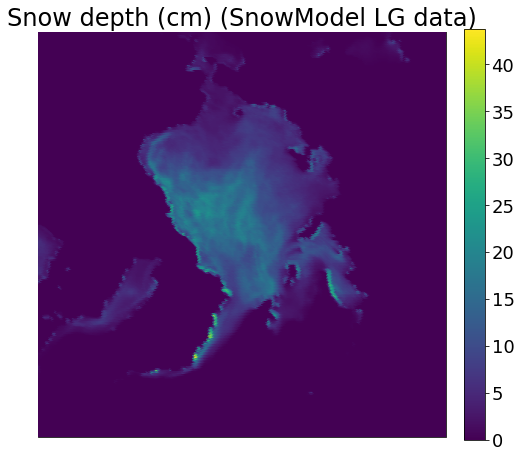

In [20]:


fig, ax = plt.subplots(1,1,figsize=(8,8),  subplot_kw={'projection': ccrs.NorthPolarStereo()})

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
#ax.add_feature(cartopy.feature.OCEAN)

lat_1d = lat.flatten();
lon_1d = lon.flatten();

snowdepth_1d = snow_depth.flatten()*100

#j = np.isnan(snowdepth_1d)
#s_depth_slice = snowdepth_1d[~j]
#lat_slice = lat_1d[~j]
#lon_slice = lon_1d[~j]

#colors = snowdepth_1d/np.max(snowdepth_1d_depth_slice)

colors = snowdepth_1d

im = ax.scatter(lon_1d, lat_1d,c = colors,s = 100, marker = '.',transform = ccrs.PlateCarree(),zorder = 5)
cb = fig.colorbar(im,ax=ax,fraction=0.046, pad=0.04)
ax.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())
cb.ax.tick_params(labelsize=18)
plt.title('Snow depth (cm) (SnowModel LG data)',fontsize = 24)
ax.gridlines()

"""         
#ax.scatter(lat[])
#ax.colorbar()
ax.set_title('Snow depth in the Arctic (cm)',fontsize=25)
cb.ax.tick_params(labelsize=18)
#ax.legend(fontsize='x-large')
ax.gridlines()
"""

In [14]:
np.shape(snow_depth)

(361, 361)

In [11]:
filename3 = '/Users/ananth/Downloads/SM_sden_MERRA2_01Aug1980-31Jul2021_v01.nc'
cube3 = iris.load(filename3)


/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/iris/fileformats/cf.py:649: UserWarning: Missing CF-netCDF grid mapping variable 'lambert_azimuthal_equal_area', referenced by netCDF variable 'sden'
  warnings.warn(message % (name, nc_var_name))


NameError: name 'snow_depth_1d' is not defined

In [8]:
filename4 = '/Users/ananth/Downloads/icemotion_weekly_nh_25km_19781105_19781231_v4.1.nc'
cube4 = iris.load(filename4)
cube4

[<iris 'Cube' of latitude / (degrees) (-- : 361; -- : 361)>,
<iris 'Cube' of longitude / (degrees) (-- : 361; -- : 361)>,
<iris 'Cube' of number_of_observations / (1) (time: 52; -- : 361; -- : 361)>,
<iris 'Cube' of sea_ice_x_velocity / (cm / s) (time: 52; projection_y_coordinate: 361; projection_x_coordinate: 361)>,
<iris 'Cube' of sea_ice_y_velocity / (cm / s) (time: 52; projection_y_coordinate: 361; projection_x_coordinate: 361)>]

In [9]:
#start_date = '08-01-1980'
#date_1 = datetime.strptime(start_date,'%m-%d-%Y').date()

start_date = '08/01/1980'
date_1 = datetime.strptime(start_date,'%m/%d/%Y').date()
#x = datetime.datetime.strptime('08/01/1980','%m/%d/%y')

In [10]:
from datetime import datetime,timedelta

datetime_str = '09/19/22'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y')

In [11]:
index_1 = date_arr.index('01/01/2020')
index_2 = date_arr.index('12/31/2020')
date_arr[index_1:index_2+1]

['01/01/2020',
 '01/02/2020',
 '01/03/2020',
 '01/04/2020',
 '01/05/2020',
 '01/06/2020',
 '01/07/2020',
 '01/08/2020',
 '01/09/2020',
 '01/10/2020',
 '01/11/2020',
 '01/12/2020',
 '01/13/2020',
 '01/14/2020',
 '01/15/2020',
 '01/16/2020',
 '01/17/2020',
 '01/18/2020',
 '01/19/2020',
 '01/20/2020',
 '01/21/2020',
 '01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/20

In [12]:
#tomcat lat and lon

tomcat_lat = [87.86, 85.10, 82.31, 79.53, 76.74,
        73.95, 71.16, 68.37, 65.58, 62.79,
        60.00, 57.21, 54.42, 51.63, 48.84,
        46.04, 43.25, 40.46, 37.67, 34.88,
        32.09, 29.30, 26.51, 23.72, 20.93,
        18.14, 15.35, 12.56,  9.77,  6.98,
         4.19,  1.40, -1.40, -4.19, -6.98,
        -9.77,-12.56,-15.35,-18.14,-20.93,
       -23.72,-26.51,-29.30,-32.09,-34.88,
       -37.67,-40.46,-43.25,-46.04,-48.84,
       -51.63,-54.42,-57.21,-60.00,-62.79,
       -65.58,-68.37,-71.16,-73.95,-76.74,
       -79.53,-82.31,-85.10,-87.86]

tomcat_lon_360 = np.arange(0,360,2.8125)

tomcat_lon = []
new_lon = 0

for i in range(len(tomcat_lon_360)):
    if tomcat_lon_360[i] > 180:
        new_lon = tomcat_lon_360[i]-360
    else:
        new_lon = tomcat_lon_360[i]
    tomcat_lon = np.append(tomcat_lon,new_lon)
    
tomcat_lon = np.sort(tomcat_lon)

In [1]:
print('min and max lat = ', np.min(lat_1d),np.max(lat_1d))
print('min and max lon = ', np.min(lon_1d),np.max(lon_1d))
X,Y = np.meshgrid (lon_1d,lat_1d)
for i in range(len(tomcat_lat)):
    for j in range(len(tomcat_lon)):
        flag = (tomcat_lat[i]>np.min(lat_1d) and tomcat_lat[i]<np.max(lat_1d) and tomcat_lon[j]>np.min(lon_1d) and tomcat_lon[j]<np.max(lon_1d))
        if flag == True:
            print(flag)
            lat_point = tomcat_lat[i]
            lon_point = tomcat_lon[j]
            data = snow_depth_annual[0,:,:]
            
            
    

NameError: name 'np' is not defined

In [1]:
snow_depth_annual

NameError: name 'snow_depth_annual' is not defined

In [ ]:
np.shape(X)

In [19]:
a = np.array([12,12,13,4,5,6])
np.where(a==4)

(array([3]),)

In [29]:
lat_org = np.sort(lat.flatten())
lon_org = np.sort(lon.flatten())

lat_1d = lat.flatten();
lon_1d = lon.flatten();

np.where(lat_org[10]==lat_1d)

#lat_org[0]


(array([     1,    359,    361,    721, 129599, 129959, 129961, 130319]),)

In [24]:
lat_org[0]

29.896942

In [25]:
lat_org[360]

32.09478

In [26]:
lat_1d[360]

29.896942

In [58]:
for i in range(361):
    print('lon_original index = ', i)
    for j in range(361):
        if j!=i:
            flag = (lon[i,:] - lon[j,:] == 0)
    #print('value of flag = ', flag)
    #print('shape of flag = ', np.shape(flag))
            if flag.all() == True:
            #print('hello')
                print ('same data at other indices = ', j)

lon_original index =  0
lon_original index =  1
lon_original index =  2
lon_original index =  3
lon_original index =  4
lon_original index =  5
lon_original index =  6
lon_original index =  7
lon_original index =  8
lon_original index =  9
lon_original index =  10
lon_original index =  11
lon_original index =  12
lon_original index =  13
lon_original index =  14
lon_original index =  15
lon_original index =  16
lon_original index =  17
lon_original index =  18
lon_original index =  19
lon_original index =  20
lon_original index =  21
lon_original index =  22
lon_original index =  23
lon_original index =  24
lon_original index =  25
lon_original index =  26
lon_original index =  27
lon_original index =  28
lon_original index =  29
lon_original index =  30
lon_original index =  31
lon_original index =  32
lon_original index =  33
lon_original index =  34
lon_original index =  35
lon_original index =  36
lon_original index =  37
lon_original index =  38
lon_original index =  39
lon_origin

In [57]:

for i in range(361):
    print('lat_original index = ', i)
    for j in range(361):
        if j!=i:
            flag = (lat[i,:] - lat[j,:] == 0)
    #print('value of flag = ', flag)
    #print('shape of flag = ', np.shape(flag))
            if flag.all() == True:
            #print('hello')
                print ('same data at other indices = ', j)

lat_original index =  0
same data at other indices =  360
lat_original index =  1
same data at other indices =  359
lat_original index =  2
same data at other indices =  358
lat_original index =  3
same data at other indices =  357
lat_original index =  4
same data at other indices =  356
lat_original index =  5
same data at other indices =  355
lat_original index =  6
same data at other indices =  354
lat_original index =  7
same data at other indices =  353
lat_original index =  8
same data at other indices =  352
lat_original index =  9
same data at other indices =  351
lat_original index =  10
same data at other indices =  350
lat_original index =  11
same data at other indices =  349
lat_original index =  12
same data at other indices =  348
lat_original index =  13
same data at other indices =  347
lat_original index =  14
same data at other indices =  346
lat_original index =  15
same data at other indices =  345
lat_original index =  16
same data at other indices =  344
lat_ori

In [53]:
lat[2,:]

masked_array(data=[30.26389 , 30.448393, 30.632214, 30.815353, 30.997808,
                   31.179575, 31.360653, 31.54104 , 31.720734, 31.89973 ,
                   32.07803 , 32.25563 , 32.432526, 32.60872 , 32.784203,
                   32.958977, 33.133038, 33.30638 , 33.479008, 33.650913,
                   33.822098, 33.992554, 34.16228 , 34.331276, 34.499535,
                   34.667057, 34.833836, 34.999874, 35.16516 , 35.3297  ,
                   35.493484, 35.656513, 35.81878 , 35.98028 , 36.141018,
                   36.300983, 36.460175, 36.61859 , 36.776222, 36.93307 ,
                   37.08913 , 37.244396, 37.39887 , 37.55254 , 37.70541 ,
                   37.85747 , 38.00872 , 38.159153, 38.30877 , 38.45756 ,
                   38.605522, 38.752655, 38.898952, 39.04441 , 39.189022,
                   39.332787, 39.475697, 39.61775 , 39.75894 , 39.89927 ,
                   40.038723, 40.177303, 40.315002, 40.45182 , 40.58775 ,
                   40.722782, 40.85692

In [68]:
lat_1d = lat.flatten();
lon_1d = lon.flatten();

snowdepth_1d = snow_depth.flatten()*100

In [71]:
snowdepth_1d.reshape((12,361,361))

ValueError: cannot reshape array of size 47567165 into shape (12,361,361)

In [72]:
np.shape(snow_depth_annual)

(12, 361, 361)

In [4]:
import numpy as np
temp_lon = np.linspace(1,2,361)
temp_lon.shape


(361,)